Dataset link :

Url = https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv

Perform following analysis on above dataset :

1. Import the dataset using Pandas from above mentioned url.

2. High Level Data Understanding:
        a. Find no. of rows & columns in the dataset
        b. Data types of columns.
        c. Info & describe of data in dataframe.

3. Low Level Data Understanding :
        a. Find count of unique values in location column.
        b. Find which continent has maximum frequency using values counts.
        c. Find maximum & mean value in 'total_cases'.
        d. Find 25%,50% & 75% quartile value in 'total_deaths'.
        e. Find which continent has maximum 'human_development_index'.
        f. Find which continent has minimum 'gdp_per_capita'.

4. Filter the dataframe with only this columns
   ['continent','location','date','total_cases','total_deaths','gdp_per_capita','
   human_development_index'] and update the data frame.

5. Data Cleaning
        a. Remove all duplicates observations
        b. Find missing values in all columns
        c. Remove all observations where continent column value is missing
        Tip : using subset parameter in dropna
        d. Fill all missing values with 0



In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
 url = 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'

df=pd.read_csv(url )
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. High Level Data Understanding:
        a. Find no. of rows & columns in the dataset
        b. Data types of columns.
        c. Info & describe of data in dataframe.

In [14]:
 #Find no. of rows & columns in the data
df.shape

(57394, 49)

In [19]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [10]:
df.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,57071,56748,57394,57394,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
unique,215,6,216,323,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ISL,Europe,Qatar,30/10/20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,323,14828,323,215,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,NaN,NaN,NaN,NaN,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,NaN,NaN,NaN,NaN,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,NaN,NaN,NaN,NaN,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,NaN,NaN,NaN,NaN,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,NaN,NaN,NaN,NaN,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000


# Low Level Data Understanding :
        a. Find count of unique values in location column.
        b. Find which continent has maximum frequency using values counts.
        c. Find maximum & mean value in 'total_cases'.
        d. Find 25%,50% & 75% quartile value in 'total_deaths'.
        e. Find which continent has maximum 'human_development_index'.
        f. Find which continent has minimum 'gdp_per_capita'.

In [48]:
#Find count of unique values in location column
df['location'].nunique()

216

In [34]:
#Find which continent has maximum frequency using values counts.
df['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [35]:
#Find maximum & mean value in 'total_cases'
df['total_cases'].max()

55154651.0

In [36]:
df['total_cases'].mean()

167797.3688753302

In [7]:
 #Find 25%,50% & 75% quartile value in 'total_deaths'.
df['total_deaths'].describe()[4:7]

25%     13.0
50%     84.0
75%    727.0
Name: total_deaths, dtype: float64

In [21]:
#Find which continent has maximum 'human_development_index'
df.groupby(["human_development_index",'continent']).human_development_index.max().tail(1)

human_development_index  continent
0.953                    Europe       0.953
Name: human_development_index, dtype: float64

In [20]:
#Find which continent has minimum 'gdp_per_capital'.
df.groupby(["gdp_per_capita",'continent']).gdp_per_capita.min().head(1)

gdp_per_capita  continent
661.24          Africa       661.24
Name: gdp_per_capita, dtype: float64

#Filter the dataframe with only this columns
  #['continent','location','date','total_cases','total_deaths','gdp_per_capita','
   #human_development_index'] and update the data frame.

In [26]:

df_new= df.filter(items=['continent','location','date','total_cases','total_deaths','gdp_per_capita',' human_development_index'])
df_new

,continent,location,date,total_cases,total_deaths,gdp_per_capita
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987
...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN


 Data Cleaning
        a. Remove all duplicates observations
        b. Find missing values in all columns
        c. Remove all observations where continent column value is missing
        Tip : using subset parameter in dropna
        d. Fill all missing values with 0

In [29]:
df_duplicates=df_new.drop_duplicates()
df_duplicates

,continent,location,date,total_cases,total_deaths,gdp_per_capita
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987
...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN


In [33]:
#Find missing values in all columns
df.isnull()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
57390,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
57391,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
57392,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


Remove all observations where continent column value is missing
        Tip : using subset parameter in dropna

In [34]:
df['continent'].isnull().sum()

646

In [36]:
df_remove=df.copy()

In [38]:
df_remove=df_remove.dropna(subset=['continent'])

In [39]:

df_remove.shape

(56748, 49)

Fill all missing values with 0

In [40]:
df_fill=df.fillna(0)
df_fill

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,13/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57390,0,0,International,14/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57391,0,0,International,15/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57392,0,0,International,16/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000


In [2]:
covid= 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'

In [3]:
df1=pd.read_csv(covid)
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. High Level Data Understanding:
        a. Find no. of rows & columns in the dataset
        b. Data types of columns.
        c. Info & describe of data in dataframe.


In [4]:
# Find no. of rows & columns in the dataset
df1.shape

(57394, 49)

In [5]:
# Data types of columns
df1.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [6]:
#Info & describe of data in dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [7]:
df1.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,57071,56748,57394,57394,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
unique,215,6,216,323,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AUT,Europe,Lithuania,30/10/20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,323,14828,323,215,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,NaN,NaN,NaN,NaN,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,NaN,NaN,NaN,NaN,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,NaN,NaN,NaN,NaN,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,NaN,NaN,NaN,NaN,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,NaN,NaN,NaN,NaN,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000


In [8]:
. Low Level Data Understanding :
        a. Find count of unique values in location column.
        b. Find which continent has maximum frequency using values counts.
        c. Find maximum & mean value in 'total_cases'.
        d. Find 25%,50% & 75% quartile value in 'total_deaths'.
        e. Find which continent has maximum 'human_development_index'.
        f. Find which continent has minimum 'gdp_per_capita'.



SyntaxError: invalid syntax (<ipython-input-8-2f507fb1b5df>, line 1)

In [9]:
#Find count of unique values in location column.
df1['location'].nunique()

216

In [10]:
#Find which continent has maximum frequency using values counts.
df1['continent'].value_counts().max()

14828

In [11]:
#Find maximum & mean value in 'total_cases'.
df1['total_cases'].mean()

167797.3688753302

In [12]:
df1['total_cases'].max()

55154651.0

In [13]:
#Find 25%,50% & 75% quartile value in 'total_deaths'.
df1['total_deaths'].describe()[4:7]

25%     13.0
50%     84.0
75%    727.0
Name: total_deaths, dtype: float64

In [14]:
#Find which continent has maximum 'human_development_index'.
df1.groupby(['human_development_index','continent']).human_development_index.max().tail(1)

human_development_index  continent
0.953                    Europe       0.953
Name: human_development_index, dtype: float64

In [15]:
#Find which continent has minimum 'gdp_per_capita'.
df1.groupby(['gdp_per_capita','continent']).gdp_per_capita.min().head(1)

gdp_per_capita  continent
661.24          Africa       661.24
Name: gdp_per_capita, dtype: float64

#. Filter the dataframe with only this columns['continent','location','date','total_cases','total_deaths','gdp_per_capita','
   human_development_index'] and update the data frame.


In [16]:
df2_new= df1.filter(items=['continent','location','date','total_cases','total_deaths','gdp_per_capita',' human_development_index'])
df2_new

,continent,location,date,total_cases,total_deaths,gdp_per_capita
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987
...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN


. Data Cleaning
        a. Remove all duplicates observations
        b. Find missing values in all columns
        c. Remove all observations where continent column value is missing
        Tip : using subset parameter in dropna
        d. Fill all missing values with 0


In [ ]:
#Remove all duplicates observations


In [18]:
df1_duplicates=df2_new.drop_duplicates()
df1_duplicates

,continent,location,date,total_cases,total_deaths,gdp_per_capita
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987
...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN


In [19]:
#Find missing values in all columns
df1.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,True,False,True,True,False,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
57390,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
57391,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
57392,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [20]:
#Remove all observations where continent column value is missing
df1['continent'].isnull().sum()

646

In [21]:
df4_remove=df1.copy()

In [22]:

df4_remove=df4_remove.dropna(subset=['continent'])

In [23]:
df4_remove.shape

(56748, 49)

Fill all missing values with 0

In [24]:
df1_fill=df1.fillna(0)

In [25]:
df1_fill

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,13/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57390,0,0,International,14/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57391,0,0,International,15/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57392,0,0,International,16/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000


Date time format :
        a. Convert date column in datetime format using pandas.to_datetime
        b. Create new column month after extracting month data from date
        column.


In [44]:
#Convert date column in datetime format using pandas.to_datetime
df1['date']=pd.to_datetime(df1['date'])
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,2020-11-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df1['Month']=df1['date'].dt.month

In [49]:
df1.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,12
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,1
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,2
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,3
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,4


Data Aggregation:
        a. Find max value in all columns using groupby function on 'continent'
        column
        Tip: use reset_index() after applying groupby
        b. Store the result in a new dataframe named 'df_groupby'.
        (Use df_groupby dataframe for all further analysis)


In [27]:
#Find max value in all columns using groupby function on 'continent'column

df1_groupby=df1.groupby('continent').max()

In [28]:
df1_groupby.reset_index(inplace=True)

Feature Engineering :
        a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'



In [29]:

df1_groupby['total_deaths_to_total_cases']=df1_groupby['total_deaths']/df1_groupby['total_cases']

df1_groupby

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_deaths_to_total_cases
0,Africa,ZWE,Zimbabwe,31/12/19,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,0.027004
1,Asia,YEM,Yemen,31/12/19,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,0.014708
2,Europe,VAT,Vatican,31/12/19,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,0.026188
3,North America,VIR,United States Virgin Islands,31/12/19,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,0.022062
4,Oceania,WLF,Wallis and Futuna,31/12/19,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,0.032685
5,South America,VEN,Venezuela,31/12/19,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,0.028251


In [ ]:
Data Visualization :
        a. Perform Univariate analysis on 'gdp_per_capita' column by plotting
        histogram using seaborn dist plot.
        b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
        c. Plot Pairplot on df_groupby dataset.
        d. Plot a bar plot of 'continent' column with 'total_cases' .
        Tip : using kind='bar' in seaborn catplot


In [ ]:
#Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

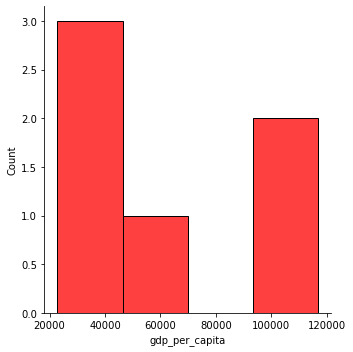

In [30]:
sns.displot(df1_groupby['gdp_per_capita'],kde=False,color='red')
plt.show()

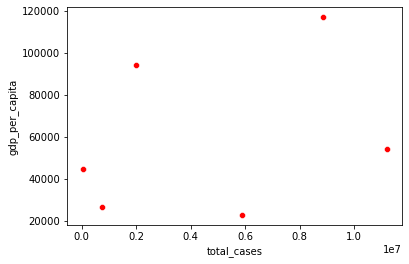

In [31]:
sns.scatterplot(data=df1_groupby,x="total_cases",y="gdp_per_capita",color='Red')

plt.show()


Plot Pairplot on df_groupby dataset.

In [ ]:
sns.pairplot(data=df1_groupby)

In [ ]:
plt.figure(figsize=(10,17))
sns.catplot(data=df1_groupby,x='continent',y='total_cases',kind='bar')
plt.xticks(rotation=90)
plt.show()

In [ ]:

df1_groupby.to_csv('latest-df-groupby')